Dataframe description

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic.It gives us information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features,we have to predict if an arbitrary passenger on Titanic would survive the sinking or not.Our target variable for this dataset is 'Survived'.

Importing the Dataset

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [204]:
df=pd.read_csv('titanic.csv')

In [205]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Checking null values in the dataframe

In [206]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are null values present in three columns,first we have to remove these,then we will proceed for the next step.

In [207]:
pd.set_option('display.max_rows',None)

In [208]:
df['Age']

0      22.00
1      38.00
2      26.00
3      35.00
4      35.00
5        NaN
6      54.00
7       2.00
8      27.00
9      14.00
10      4.00
11     58.00
12     20.00
13     39.00
14     14.00
15     55.00
16      2.00
17       NaN
18     31.00
19       NaN
20     35.00
21     34.00
22     15.00
23     28.00
24      8.00
25     38.00
26       NaN
27     19.00
28       NaN
29       NaN
30     40.00
31       NaN
32       NaN
33     66.00
34     28.00
35     42.00
36       NaN
37     21.00
38     18.00
39     14.00
40     40.00
41     27.00
42       NaN
43      3.00
44     19.00
45       NaN
46       NaN
47       NaN
48       NaN
49     18.00
50      7.00
51     21.00
52     49.00
53     29.00
54     65.00
55       NaN
56     21.00
57     28.50
58      5.00
59     11.00
60     22.00
61     38.00
62     45.00
63      4.00
64       NaN
65       NaN
66     29.00
67     19.00
68     17.00
69     26.00
70     32.00
71     16.00
72     21.00
73     26.00
74     32.00
75     25.00
76       NaN

By taking median and mode,we can remove the null values in the columns

In [209]:
df['Age']=df['Age'].fillna(np.mean(df['Age']))

In [210]:
imp=SimpleImputer(strategy='most_frequent')
df['Cabin']=imp.fit_transform(df['Cabin'].values.reshape(-1,1))

In [211]:
imp=SimpleImputer(strategy='most_frequent')
df['Embarked']=imp.fit_transform(df['Embarked'].values.reshape(-1,1))

In [212]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Now there are no null values,we have removed it

In [213]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Checking the distribution of the continuous value of the float type columns

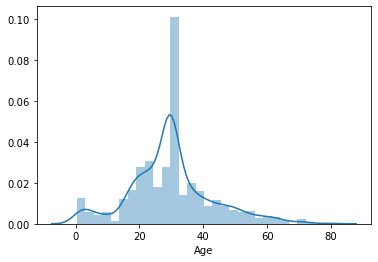

In [214]:
import seaborn as sns
sns.distplot(df['Age'],kde=True)

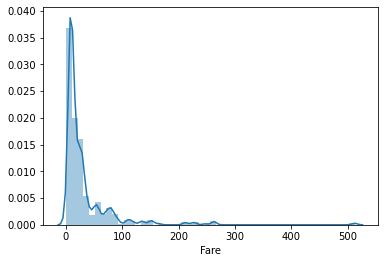

In [215]:
sns.distplot(df['Fare'],kde=True)

Since the dataset has string values,we will use the encoding techniques to convert the string data to numerical one

Encoding of DataFrame

In [216]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [217]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [218]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108.0,1.0,22.000000,1,0,523.0,7.2500,47.0,2.0
1,2,1,1,190.0,0.0,38.000000,1,0,596.0,71.2833,81.0,0.0
2,3,1,3,353.0,0.0,26.000000,0,0,669.0,7.9250,47.0,2.0
3,4,1,1,272.0,0.0,35.000000,1,0,49.0,53.1000,55.0,2.0
4,5,0,3,15.0,1.0,35.000000,0,0,472.0,8.0500,47.0,2.0
5,6,0,3,554.0,1.0,29.699118,0,0,275.0,8.4583,47.0,1.0
6,7,0,1,515.0,1.0,54.000000,0,0,85.0,51.8625,129.0,2.0
7,8,0,3,624.0,1.0,2.000000,3,1,395.0,21.0750,47.0,2.0
8,9,1,3,412.0,0.0,27.000000,0,2,344.0,11.1333,47.0,2.0
9,10,1,2,576.0,0.0,14.000000,1,0,132.0,30.0708,47.0,0.0


Describe the dataset:

In [219]:
df.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,445.000000,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,53.639731,1.536476
std,257.353842,0.486592,0.836071,257.353842,0.477990,13.002015,1.102743,0.806057,200.850657,49.693429,23.568293,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,222.500000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,47.000000,1.000000
50%,446.000000,0.000000,3.000000,445.000000,1.000000,29.699118,0.000000,0.000000,337.000000,14.454200,47.000000,2.000000
75%,668.500000,1.000000,3.000000,667.500000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,47.000000,2.000000
max,891.000000,1.000000,3.000000,890.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,146.000000,2.000000


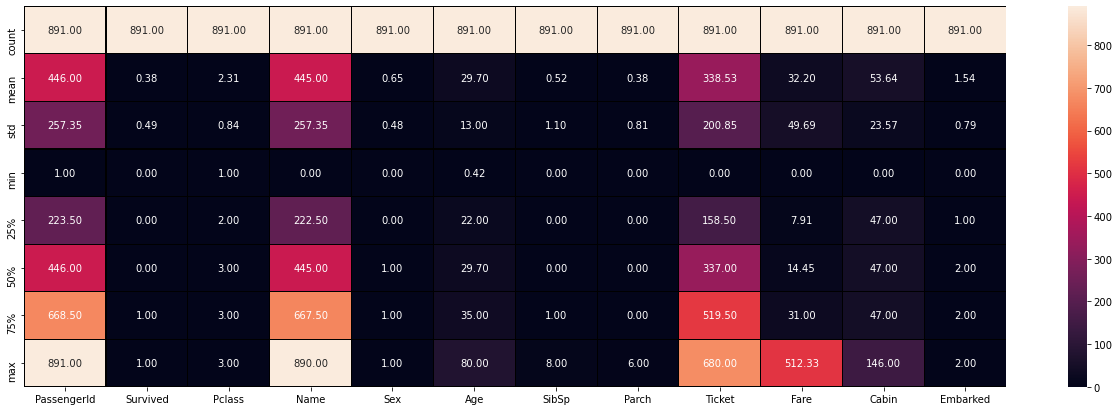

In [220]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

Correlation of the columns with the target columns:

In [221]:
df.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.033207,-0.057527,-0.001652,-0.056554,0.012658,-0.018086,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.069809,-0.035322,0.081629,-0.164549,0.257307,0.175690,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.331339,0.083081,0.018443,0.319869,-0.549500,-0.248495,0.162098
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.057466,-0.017230,-0.049105,0.047348,-0.049173,0.034129,-0.006117
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.084153,-0.114631,-0.245489,0.059372,-0.182333,-0.102643,0.108262
Age,0.033207,-0.069809,-0.331339,0.057466,0.084153,1.000000,-0.232625,-0.179191,-0.068848,0.091566,0.056011,-0.026749
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.232625,1.000000,0.414838,0.079461,0.159651,-0.005539,0.068230
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.179191,0.414838,1.000000,0.020003,0.216225,0.022682,0.039798
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.068848,0.079461,0.020003,1.000000,-0.013885,-0.072200,-0.001729
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.091566,0.159651,0.216225,-0.013885,1.000000,0.090516,-0.224719


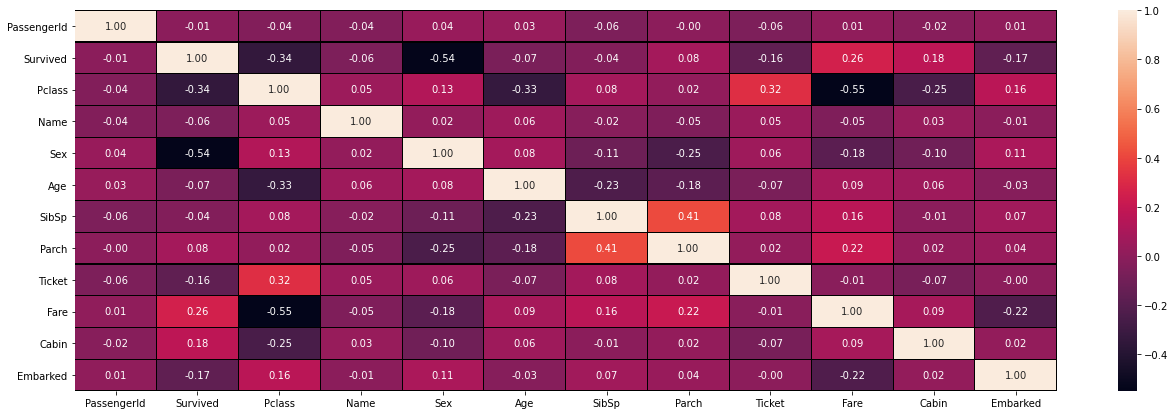

In [222]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

Checking the columns which are positively and negatively correlated with the target columns

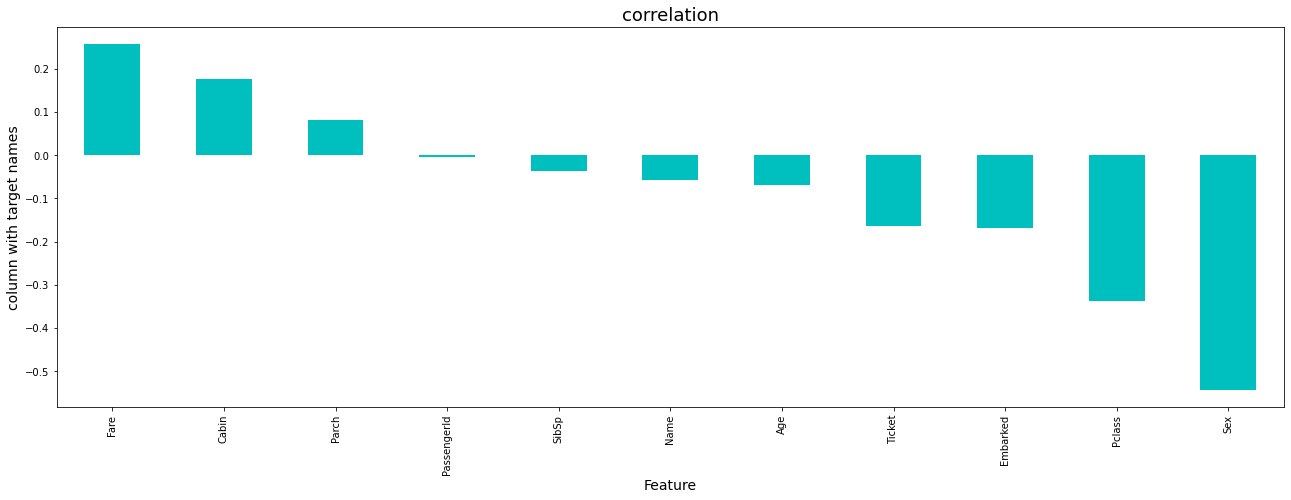

In [223]:
plt.figure(figsize=(22,7))
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [224]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Name           0.000000
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Ticket         0.000246
Fare           4.787317
Cabin          2.268926
Embarked      -1.264823
dtype: float64

Keeping +/-0.5 as the range for skewness,here are the columns which does not lie within this range. 

Pclass-Categorical
Sex-Categorical(object datatype)
SibSp-Categorical
Parch-Categorical
Cabin-object datatype
Embarked-object datatype
Fare-Float type

We will only remove skewness from column'Fare' as it is float type 

Separating the independent and target variable in x and y

In [225]:
#Separating the independent and target variable in x and y
x=df.drop('Survived',axis=1)
y=df['Survived']

In [226]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108.0,1.0,22.000000,1,0,523.0,7.2500,47.0,2.0
1,2,1,1,190.0,0.0,38.000000,1,0,596.0,71.2833,81.0,0.0
2,3,1,3,353.0,0.0,26.000000,0,0,669.0,7.9250,47.0,2.0
3,4,1,1,272.0,0.0,35.000000,1,0,49.0,53.1000,55.0,2.0
4,5,0,3,15.0,1.0,35.000000,0,0,472.0,8.0500,47.0,2.0
5,6,0,3,554.0,1.0,29.699118,0,0,275.0,8.4583,47.0,1.0
6,7,0,1,515.0,1.0,54.000000,0,0,85.0,51.8625,129.0,2.0
7,8,0,3,624.0,1.0,2.000000,3,1,395.0,21.0750,47.0,2.0
8,9,1,3,412.0,0.0,27.000000,0,2,344.0,11.1333,47.0,2.0
9,10,1,2,576.0,0.0,14.000000,1,0,132.0,30.0708,47.0,0.0


In [227]:
from sklearn.preprocessing import PowerTransformer
df_new=PowerTransformer(method='yeo-johnson')
df_new1=df_new.fit_transform(df.iloc[:,9:10])

In [228]:
df_N=pd.DataFrame(df_new1)
df_N

,0
0,-0.878820
1,1.336651
2,-0.790065
3,1.067352
4,-0.774439
5,-0.725002
6,1.045516
7,0.184264
8,-0.449944
9,0.530176


Skewness has been removed

In [229]:
df_N.skew()

0   -0.040329
dtype: float64

In [239]:
df.drop(['Fare'],axis=1,inplace=True)

In [240]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked
0,1,0,3,108.0,1.0,22.0,1,0,523.0,47.0,2.0
1,2,1,1,190.0,0.0,38.0,1,0,596.0,81.0,0.0
2,3,1,3,353.0,0.0,26.0,0,0,669.0,47.0,2.0
3,4,1,1,272.0,0.0,35.0,1,0,49.0,55.0,2.0
4,5,0,3,15.0,1.0,35.0,0,0,472.0,47.0,2.0


In [245]:
df_updated=pd.concat([df,df_N],axis=1)

In [247]:
df_updated

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,0
0,1,0,3,108.0,1.0,22.000000,1,0,523.0,47.0,2.0,-0.878820
1,2,1,1,190.0,0.0,38.000000,1,0,596.0,81.0,0.0,1.336651
2,3,1,3,353.0,0.0,26.000000,0,0,669.0,47.0,2.0,-0.790065
3,4,1,1,272.0,0.0,35.000000,1,0,49.0,55.0,2.0,1.067352
4,5,0,3,15.0,1.0,35.000000,0,0,472.0,47.0,2.0,-0.774439
5,6,0,3,554.0,1.0,29.699118,0,0,275.0,47.0,1.0,-0.725002
6,7,0,1,515.0,1.0,54.000000,0,0,85.0,129.0,2.0,1.045516
7,8,0,3,624.0,1.0,2.000000,3,1,395.0,47.0,2.0,0.184264
8,9,1,3,412.0,0.0,27.000000,0,2,344.0,47.0,2.0,-0.449944
9,10,1,2,576.0,0.0,14.000000,1,0,132.0,47.0,0.0,0.530176


Outliers Check

In [249]:
df_updated.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name           float64
Sex            float64
Age            float64
SibSp            int64
Parch            int64
Ticket         float64
Cabin          float64
Embarked       float64
0              float64
dtype: object

Checking the outliers on the int and float type of columns

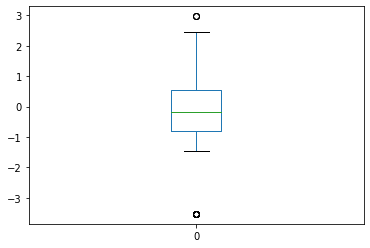

In [253]:
df_updated[0].plot.box()

In [233]:
#Removing outliers
#from scipy.stats import zscore
#z=np.abs(zscore(df))
#threshold=3
#np.where(z>3)

In [248]:
df_updated.shape

(891, 12)

In [235]:
#df_new_z=df[(z<3).all(axis=1)]
#df_new_z

In [236]:
#df_new_z.shape

In [237]:
#Percentage loss
#loss_percent=(891-786)/891*100
#print(loss_percent)

12% data loss is not acceptable,so we will proceed without removing the outlier

In [254]:
df_updated['Survived'].unique()

array([0, 1], dtype=int64)

Finding the random state

In [256]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is',maxAccu,'on Random_state',maxRS)

Best accuracy is 0.8619402985074627 on Random_state 6


Creating train-test split

In [257]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=6)

In [259]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
svc=SVC()

In [260]:
model=[LR,dt,rf,svc]
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('accuracyscore:of',m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

accuracyscore:of LogisticRegression()
0.8619402985074627
[[160  14]
 [ 23  71]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       174
           1       0.84      0.76      0.79        94

    accuracy                           0.86       268
   macro avg       0.85      0.84      0.84       268
weighted avg       0.86      0.86      0.86       268

accuracyscore:of DecisionTreeClassifier()
0.7873134328358209
[[144  30]
 [ 27  67]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       174
           1       0.69      0.71      0.70        94

    accuracy                           0.79       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268

accuracyscore:of RandomForestClassifier()
0.8507462686567164
[[156  18]
 [ 22  72]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89

We are getting highest accuracy with Logistic Regression(86%) but it can be due to overfitting also,so we will check cross validation scores.

Cross Validation Scores

In [261]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(LR,x,y,cv=5)
print('Cross validation score of Logistic Regression model:',scr.mean())

Cross validation score of Logistic Regression model: 0.7923796371853618


In [262]:
scr=cross_val_score(dt,x,y,cv=5)
print('Cross validation score of Decision Tree Classifier model:',scr.mean())

Cross validation score of Decision Tree Classifier: 0.7510074697131379


In [263]:
scr=cross_val_score(rf,x,y,cv=5)
print('Cross validation score of Random Forest Regressor model:',scr.mean())

Cross validation score of Random Forest Regressor model: 0.8417487916640513


In [264]:
scr=cross_val_score(svc,x,y,cv=5)
print('Cross validation score of SVC model:',scr.mean())

Cross validation score of SVC model: 0.8237838177138912


The difference between accuracy score and cross validation score is 1 in Random Forest Regressor model.It is the minimum difference,so the best model is Random forest Regressor.

Hyperparameter tuning

In [265]:
from sklearn.model_selection import GridSearchCV

In [269]:
parameters={'max_depth':np.arange(2,15),'criterion':['gini','entropy']}
GCV=GridSearchCV(rf,parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [270]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 8}

In [271]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [272]:
accuracy_score(y_test,GCV_pred)

0.8507462686567164

The accuracy of the model is increased by 1%.

In [275]:
import joblib
joblib.dump(GCV.best_estimator_,'TitanicRF.pkl')

['TitanicRF.pkl']